<b>Analisis exploratorio de los datos<b>

In [59]:
# Cargo las librerias que voy a utilizar.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
# Leo el CSV que voy a utilizar para realizar el analisis.
df = pd.read_csv('plataformas.csv', sep= ",")

In [61]:
# Visualizo el DataFrame para ver que este correctametne presentado
df.head()

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113.0,min,3.5
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,110.0,min,3.5
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74.0,min,3.5
3,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",69.0,min,3.5
4,as5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,45.0,min,3.5


In [62]:
# Vizualizo la cantidad de columnas y registros al mismo tiempo el nombre de las columnas. Tambien se puede ver si hay columnas con valores null de una manera rapida.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   listed_in      22998 non-null  object 
 10  description    22994 non-null  object 
 11  duration_int   22516 non-null  float64
 12  duration_type  22516 non-null  object 
 13  score          22998 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 2.5+ MB


In [63]:
# Aca realizao una suma de los nulos en cada columna para apreciar mejor.
df.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
duration_int       482
duration_type      482
score                0
dtype: int64

Haber realizado esta busqueda me indica que hay 4 columnas del DF que presentan entre el 30% y 50% de sus registros nulos. Se tiene que averiguar la causa y de ser necesario corregirla.
Ya que no se pueden utilizar como fuente de informacion o analisis.

<b>Realizo un .describe de los datos para el tipo de peliculas para verificar el mean, la desviacion estandar, los cuartiles, minimos y maximos valores.<b>

In [64]:
df[df["type"] == 'movie'].describe()

,release_year,duration_int,score
count,16481.000000,15999.000000,16481.000000
mean,2009.224562,93.638852,3.532892
std,17.168334,35.861507,0.056944
min,1920.000000,0.000000,3.300000
25%,2008.000000,81.000000,3.500000
50%,2016.000000,94.000000,3.500000
75%,2019.000000,109.000000,3.600000
max,2021.000000,601.000000,3.700000


<b>Este punto de vista me permitio apreciar lo siguiente con lo que respecta a peliculas:<b>

- La pelicula/s mas vieja es de 1920 y la mas nuevas de 2021.
- La mediana de las peliculas se encuentra en un rango cercano a 2016.
- La media de las pelicas se encuentra en el 2009.
- Su desviacion estandar es baja por lo que sugiere que las peliculas estan distribuidas en reducidas fechas, pero que en lo que respecta a su duracion si estan mas distribuidas.
- La pelicula con menor duracion es de 0 minutos puede llegar a ser un outlier. 
- La pelicula con mayor duracion es de 601 posiblemente sea un outlier ya que la media de las peliculas es 93 minutos.
- El menor score es 3.3 y el mayor es 3.7.
- La media es 3.53.
- La mediana de los scores es 3.5.

<b>Realizo un .describe de los datos para el tipo de TV SHOW para verificar el mean, la desviacion estandar, los cuartiles, minimos y maximos valores.<b>

In [65]:
df[df["type"] == 'tv show'].describe()

,release_year,duration_int,score
count,6517.000000,6517.000000,6517.000000
mean,2014.823845,2.007672,3.534280
std,8.318106,2.231589,0.056881
min,1925.000000,1.000000,3.300000
25%,2014.000000,1.000000,3.500000
50%,2017.000000,1.000000,3.500000
75%,2020.000000,2.000000,3.600000
max,2021.000000,34.000000,3.700000


<b>Este punto de vista me permitio apreciar lo siguiente con lo que respecta a TV SHOW:<b>

- El show mas viejo es de 1925 y el mas nuevo de 2021
- La mediana de las series es en un rango cerca de 2017
- La media de las series son del 2014.
- Su desviacion estandar es baja por lo que sugiere que las series estan distribuidas en reducidas fechas.
- La duracion minima es de 1 (season) y maxima de 34 habria que ver si la maxima no es un outlier.
- La media de las season es de 2.  

<b>Realizo un boxplot y un grafico de densidad de la columna score para apreciar de manera mas vizual lo que se comenta previamente la concentracion de los mismos<b>

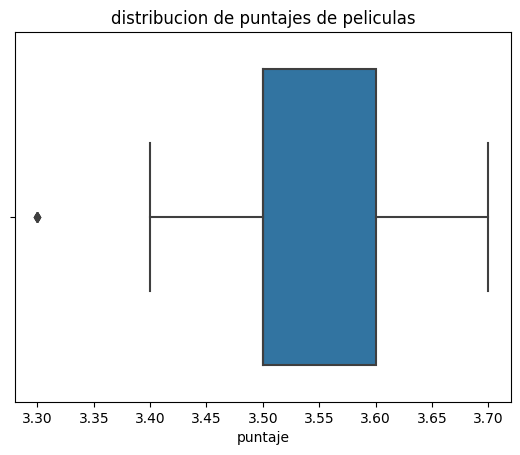

In [66]:
sns.boxplot(x=df["score"]) 
plt.title("distribucion de puntajes de peliculas") 
plt.xlabel("puntaje")
plt.show()

<AxesSubplot: ylabel='Density'>

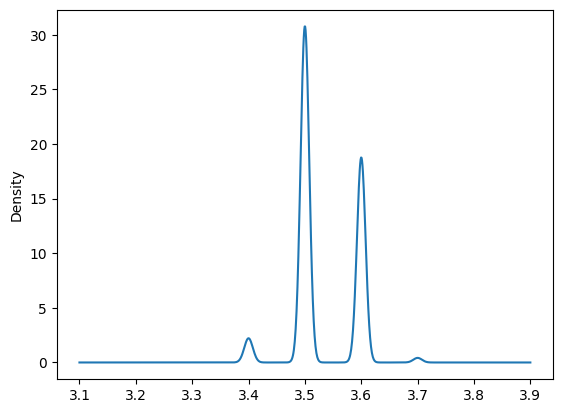

In [67]:
df['score'].plot.kde()

<b>Aca tengo que realizar modificaciones a la columna duration_int ya que la misma presenta nulos como apreciamos mas arriba, lo cual provoca que no pueda graficar.<b>

In [68]:
df[df['duration_int'].isnull()]

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
11118,hs1,movie,ricky velez: here's everything,NaN,NaN,NaN,2021-10-24,2021,tv-ma,"comedy, stand up",​comedian ricky velez bares it all with his ho...,NaN,NaN,3.6
11130,hs13,movie,out of the shadows: the man behind the steele ...,NaN,NaN,NaN,2021-10-18,2021,g,news,george stephanopoulos sits down with former mi...,NaN,NaN,3.6
11133,hs16,movie,showtime championship boxing: lopez vs. salido...,NaN,NaN,NaN,2021-10-16,2011,g,sports,juan manuel lopez vs. orlando salido for the w...,NaN,NaN,3.6
11155,hs38,movie,bellator mma: kongo vs. johnson 2,NaN,NaN,NaN,2021-10-13,2020,g,sports,cheick kongo vs. tim johnson battle in a histo...,NaN,NaN,3.5
11158,hs41,movie,in the crease,NaN,NaN,NaN,2021-10-13,2020,g,sports,post-game analysis and highlight show airing e...,NaN,NaN,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14077,hs2960,movie,packed to the rafters,NaN,NaN,australia,2013-12-03,2008,6 seasons,"comedy, drama, international",packed to the rafters is an australian family-...,NaN,NaN,3.5
14111,hs2994,movie,amy winehouse: a final goodbye,NaN,NaN,united kingdom,2012-12-13,2011,71 min,"documentaries, music",a final goodbye is an intimate look into the l...,NaN,NaN,3.6
19732,ns5542,movie,louis c.k. 2017,louis c.k.,louis c.k.,united states,2017-04-04,2017,74 min,movies,"louis c.k. muses on religion, eternal love, gi...",NaN,NaN,3.5
19985,ns5795,movie,louis c.k.: hilarious,louis c.k.,louis c.k.,united states,2016-09-16,2010,84 min,movies,emmy-winning comedy writer louis c.k. brings h...,NaN,NaN,3.4


In [69]:
# A pesar de no considerar una buena practica antes que eliminar los 482 registros de nulos preferi rellenarlos con el promedio.
# Aun teniendo en cuenta que esten errados esos valores decidi realizarlo de esa manera.
mean_value = df['duration_int'].mean()
df['duration_int'] = df['duration_int'].fillna(mean_value)

Text(0.5, 1.0, 'Boxplot')

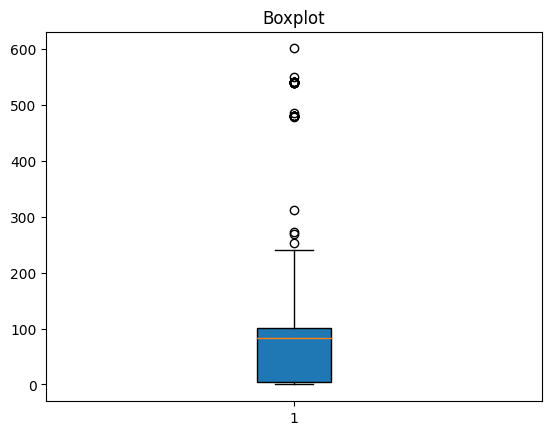

In [70]:
# boxplot rectangular 
plt.boxplot(df['duration_int'],vert=True,patch_artist=True)
plt.title("Boxplot")

<b>El boxplot me presenta una problematica donde pareciera que gran cantidad de los registros son outliers, por lo mismo a continuacion decido realizar un filtro para apreciar los titulos y sus caracteristicas<b>

Esto me refleja que la mayoria de los titulos con mayor duracion corresponden a documentales o special interest.

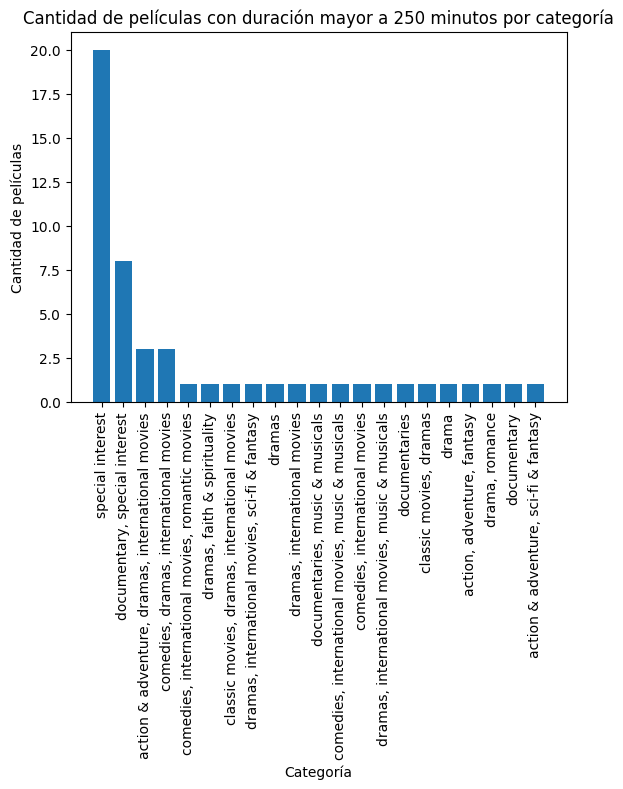

In [71]:
# Filtro el DataFrame para seleccionar las películas con duración mayor a 250 minutos
long_movies = df[(df["type"] == 'movie') & (df['duration_int'] > 200)]

# Cuento la cantidad de películas por categoría
category_counts = long_movies['listed_in'].value_counts()

# Creo el gráfico de barras
plt.bar(category_counts.index, category_counts)

# Roto las etiquetas del eje x para que se lean correctamente
plt.xticks(rotation=90)

# Agrego etiquetas
plt.xlabel('Categoría')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas con duración mayor a 250 minutos por categoría')
plt.show()


Decidi ver los titulos de estas caracteristicas solo para verificar algunos y sus detalles.

In [72]:
df[(df["type"] == 'movie') & (df['duration_int'] > 250)].head()

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
147,as148,movie,waterfalls for sleep 8 hours,mark knight,NaN,NaN,NaN,2016,all,"documentary, special interest",featuring uninterrupted ultra dark video of ni...,480.0,min,3.5
933,as934,movie,soothing surf at del norte for sleep black screen,mark knight,NaN,NaN,NaN,2018,all,special interest,black screen reduces the blue-spectrum light w...,601.0,min,3.6
934,as935,movie,soothing surf at carmel beach for sleep,mark knight,NaN,NaN,NaN,2017,all,special interest,8 hours for a full night's sleep. let the roll...,480.0,min,3.5
1672,as1673,movie,midnight waterfalls for sleep 8 hours,mark knight,NaN,NaN,NaN,2019,g,special interest,sharecare windows presents a darker-screen ver...,480.0,min,3.6
1673,as1674,movie,midnight thunderstorm for sleep 9 hours,mark knight,NaN,NaN,NaN,2014,all,special interest,our most popular ambient sleep video is a full...,541.0,min,3.5


Trato de hacer un enfoque sobre la columna score poder ver que caracteristicas presenta con respecto al resto:

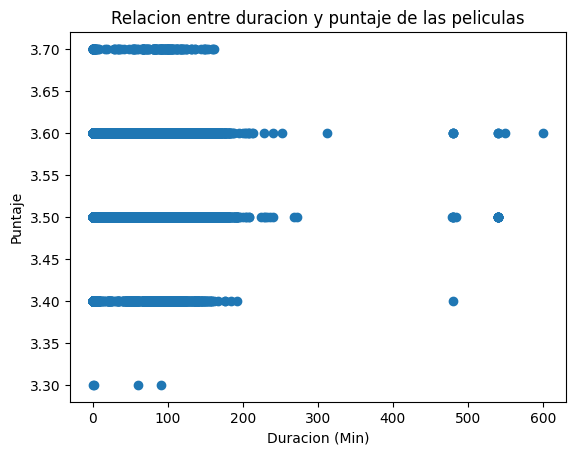

In [73]:
# Trto de ver la distribucion de los score con respecto a la duracion de las ppeliculas. Desde mi ppunto de vista no apporta mucha inforamcion se podria decir que dentro de todo estan bastante dispersas.
plt.scatter(x=df["duration_int"], y=df["score"]) 
plt.title("Relacion entre duracion y puntaje de las peliculas")
plt.xlabel("Duracion (Min)") 
plt.ylabel("Puntaje") 
plt.show()

Realizo un histograma para apreciar visualmente donde se ubican mayormente los score de los registros.

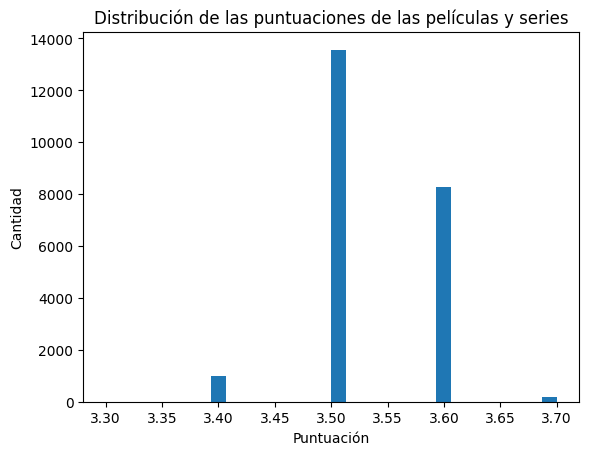

In [74]:
# Creo el histograma
plt.hist(df['score'], bins=30)

# Agrego etiquetas
plt.xlabel('Puntuación')
plt.ylabel('Cantidad')
plt.title('Distribución de las puntuaciones de las películas y series')

# Muestro el gráfico
plt.show()


<b>Grafico basandome en el año de lanzamiento:<b>

En los graficos siguientes se puede appreciar el aumento de peliculas a partir del año 2000.

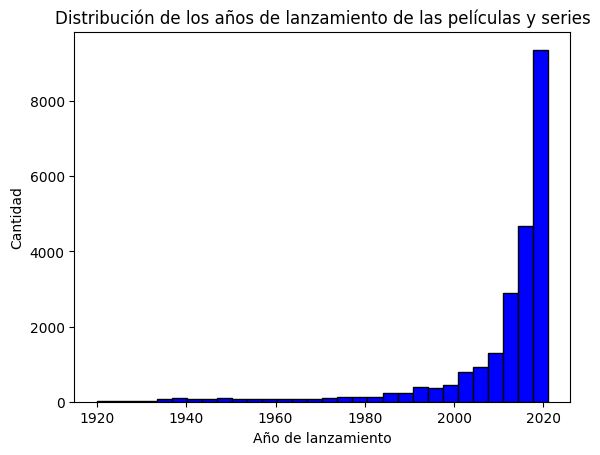

In [75]:
# Creo el histograma
plt.hist(df['release_year'], bins=30,edgecolor='black', color='blue')

# Agrego etiquetas
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad')
plt.title('Distribución de los años de lanzamiento de las películas y series')

# Muestro el gráfico
plt.show()


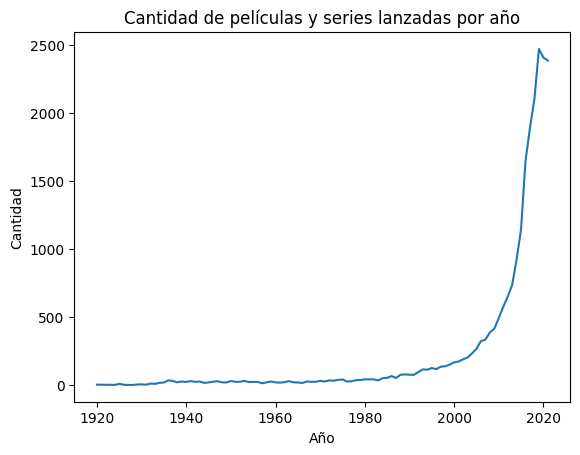

In [76]:
# Cuento el número de películas y series lanzadas cada año
year_counts = df['release_year'].value_counts().sort_index()

# Creo el gráfico de líneas
plt.plot(year_counts.index, year_counts.values)

# Agrego títulos y etiquetas de los ejes
plt.title('Cantidad de películas y series lanzadas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

# Muestro el gráfico
plt.show()


Enfoque en las variables categoricas:

Decidi revisar las variables categoricas por medio de histogramas para apreciar sus registros unicos.

In [77]:
df.head(1)

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113.0,min,3.5


Se aprecia mayor concentracion de peliculas en el dataset.

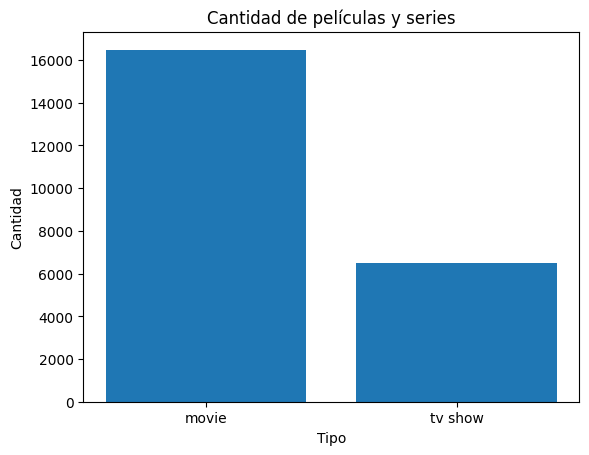

In [78]:
# Cuento el número de películas y series
type_counts = df['type'].value_counts()

# Creo el gráfico de barras
plt.bar(type_counts.index, type_counts.values)

# Agrego títulos y etiquetas de los ejes
plt.title('Cantidad de películas y series')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')

# Muestro el gráfico
plt.show()


El siguiente grafico nos permite apreciar que en la columna rating tenemos una mala distribucion de los registros y al mismo tiempo datos mal cargados.
En la misma se espera la clasificacion de pelicula segun su edad permitida pero tiene cargados duraciones.

Tambien por eso el grafico se tuvo que realizar tan grande ya que las que no eran clasificaciones tapaban el grafico.

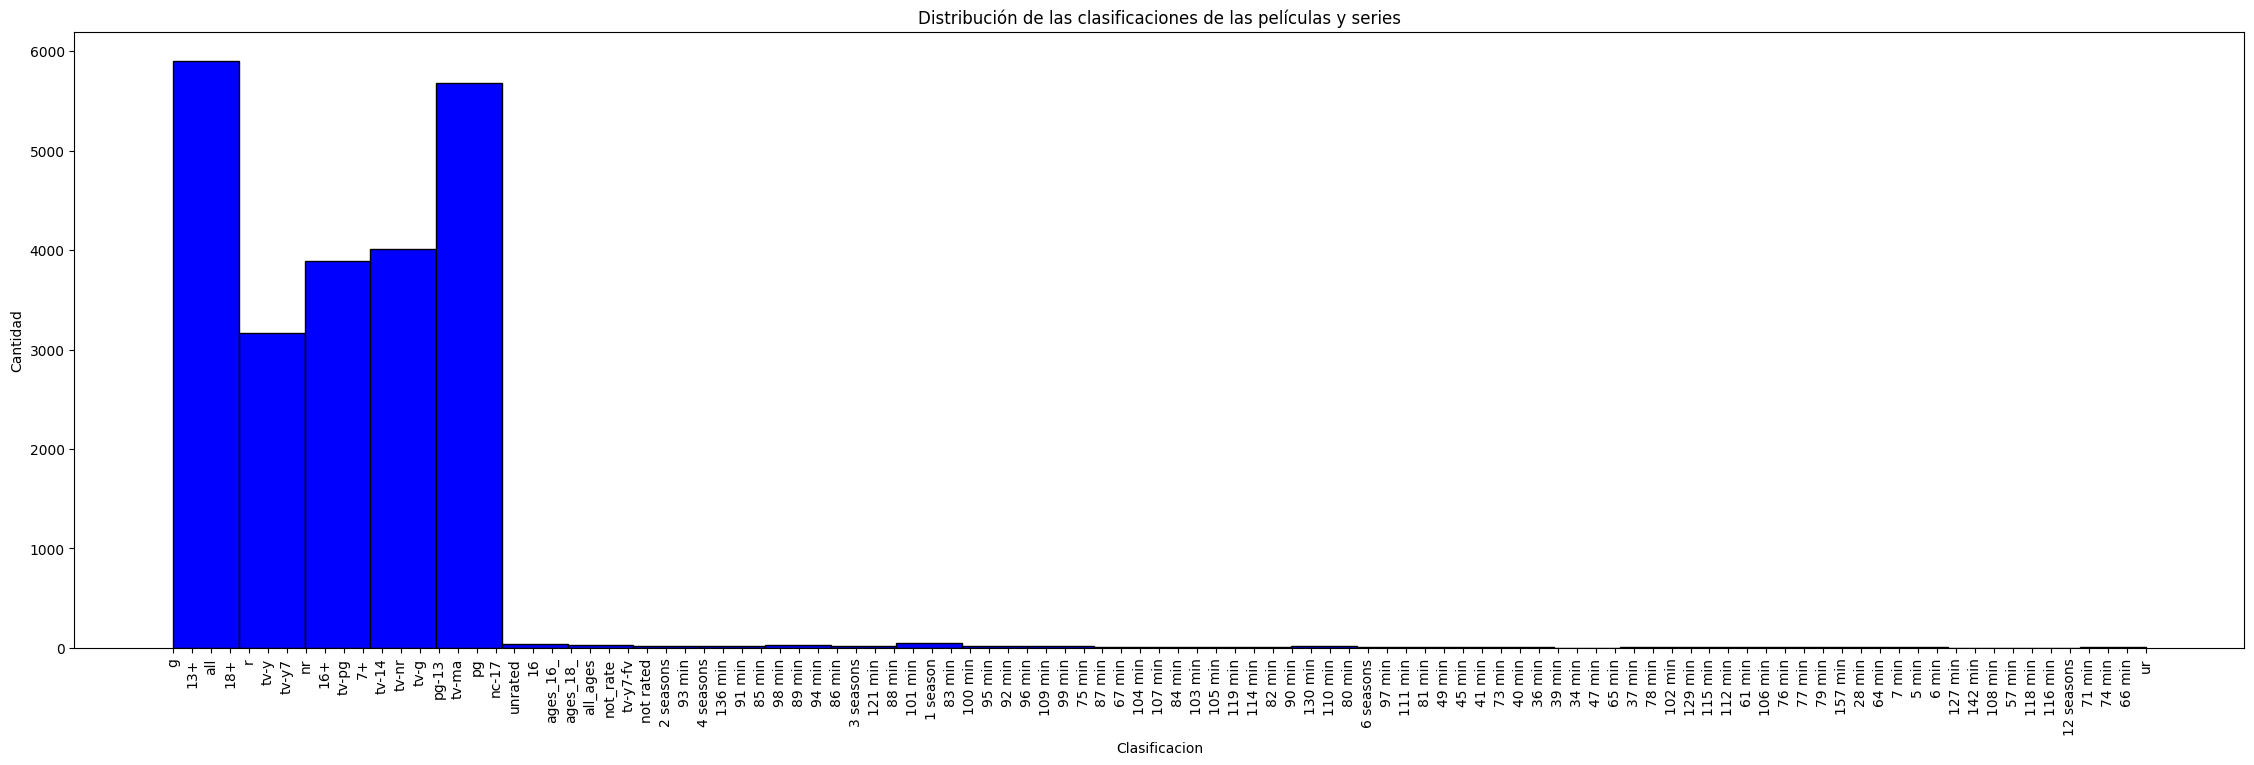

In [79]:
plt.figure(figsize=(28, 8))  # establezco el tamaño de la figura
# Creo el histograma
plt.hist(df['rating'], bins=30, edgecolor='black', color='blue')

# Agrego etiquetas
plt.xlabel('Clasificacion')
plt.ylabel('Cantidad')
plt.title('Distribución de las clasificaciones de las películas y series')
# Roto las etiquetas del eje x para que se lean correctamente
plt.xticks(rotation=90)

# Muestro el gráfico
plt.show()


In [80]:
#Realizo un Print para ver que tipos de registro hay en la columna.
print(df['rating'].unique())

['g' '13+' 'all' '18+' 'r' 'tv-y' 'tv-y7' 'nr' '16+' 'tv-pg' '7+' 'tv-14'
 'tv-nr' 'tv-g' 'pg-13' 'tv-ma' 'pg' 'nc-17' 'unrated' '16' 'ages_16_'
 'ages_18_' 'all_ages' 'not_rate' 'tv-y7-fv' 'not rated' '2 seasons'
 '93 min' '4 seasons' '136 min' '91 min' '85 min' '98 min' '89 min'
 '94 min' '86 min' '3 seasons' '121 min' '88 min' '101 min' '1 season'
 '83 min' '100 min' '95 min' '92 min' '96 min' '109 min' '99 min' '75 min'
 '87 min' '67 min' '104 min' '107 min' '84 min' '103 min' '105 min'
 '119 min' '114 min' '82 min' '90 min' '130 min' '110 min' '80 min'
 '6 seasons' '97 min' '111 min' '81 min' '49 min' '45 min' '41 min'
 '73 min' '40 min' '36 min' '39 min' '34 min' '47 min' '65 min' '37 min'
 '78 min' '102 min' '129 min' '115 min' '112 min' '61 min' '106 min'
 '76 min' '77 min' '79 min' '157 min' '28 min' '64 min' '7 min' '5 min'
 '6 min' '127 min' '142 min' '108 min' '57 min' '118 min' '116 min'
 '12 seasons' '71 min' '74 min' '66 min' 'ur']


In [81]:
# Debido a lo mencionado anterior decido normalizar las columnas y todas las que no tienen una clasificacion correspondiente pasen a ser no rated. Esto me va a permitr realizar un mejor vistazo de la distribucion.
# En la funcion estoy indicando que si no contiene ninguna de esas descirpciones que las pase a not rated.
def transform_rating(rating):
    if rating in ['g', '13+', 'all', '18+', 'r', 'tv-y', 'tv-y7', '16+', 'tv-pg', '7+', 'tv-14','tv-g', 'pg-13', 'tv-ma', 'pg', 'nc-17', '16', 'ages_16_', 'ages_18_', 'all_ages', 'tv-y7-fv']:
        return rating
    else:
        return 'not rated'

# Aplico la función a la columna 'rating'.
df['rating'] = df['rating'].apply(transform_rating)


In [82]:
#Realizo un Print para ver que tipos de registro quedaron y ver si puedo seguir normalizando.
print(df['rating'].unique())

['g' '13+' 'all' '18+' 'r' 'tv-y' 'tv-y7' 'not rated' '16+' 'tv-pg' '7+'
 'tv-14' 'tv-g' 'pg-13' 'tv-ma' 'pg' 'nc-17' '16' 'ages_16_' 'ages_18_'
 'all_ages' 'tv-y7-fv']


In [83]:
# Normalizo los que sugieren pertenecer a la misma categoria pero estan escirtos de manera distinta.
df['rating'].replace({'ages_16_': '16+','16':'16+', 'ages_18_': '18+', 'all_ages': '18+', 'all' : '18+' }, inplace=True)

Luego de la transformacion se puede apreciar mejor la distribucion de las categorias en la columna rating. Decidi realizar 3 graficos uno general y luego separar entre movies y tv show.
Esta separacion me permite ver ccomo se dsitribuyen sus clasificaicones segun que tipo son.

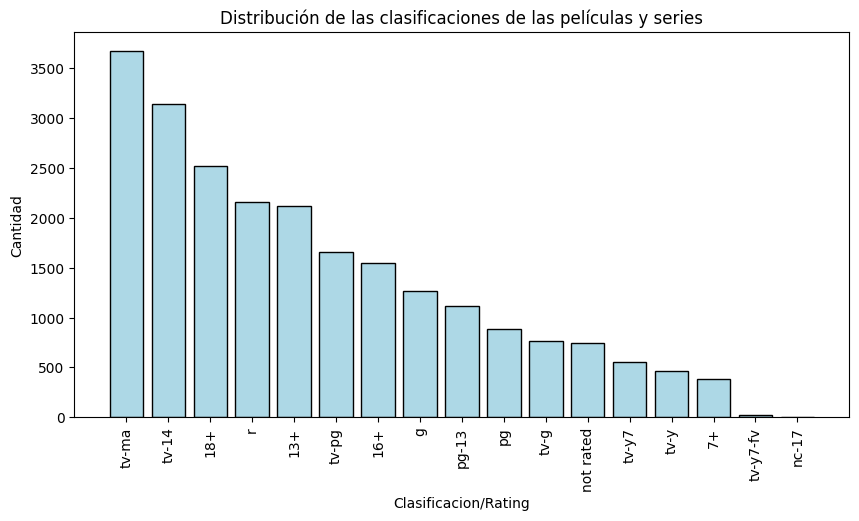

In [84]:
# Obtngo el número exacto de cada valor en la columna 'rating'
rating_counts = df['rating'].value_counts()

# Ordeno los valores de mayor a menor
rating_counts = rating_counts.sort_values(ascending=False)

# Creo el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(rating_counts.index, rating_counts.values, color='lightblue', edgecolor='black')
plt.xlabel('Clasificacion/Rating')
plt.ylabel('Cantidad')
plt.title('Distribución de las clasificaciones de las películas y series')
plt.xticks(rotation=90)
plt.show()


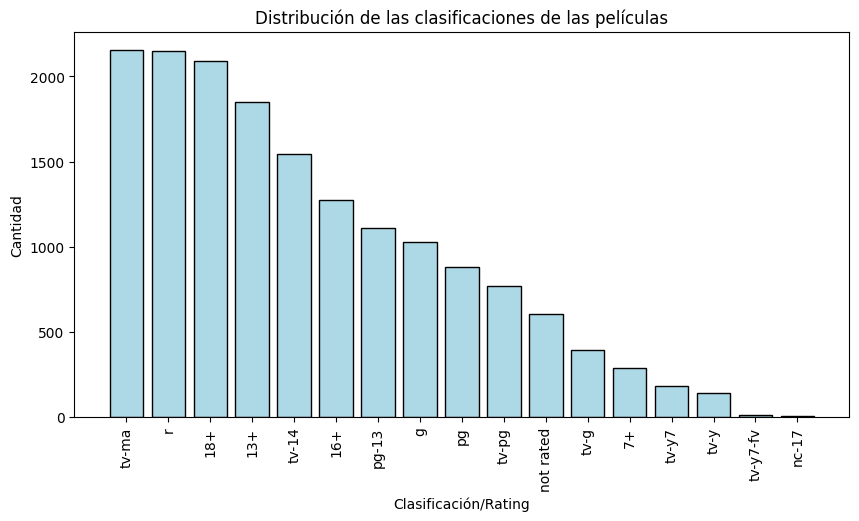

In [85]:
# Filtro por tipo "movie"
movie_df = df[df['type'] == 'movie']

# Cuento el número de películas por rating
rating_counts = movie_df['rating'].value_counts()

# Ordeno los valores de mayor a menor
rating_counts = rating_counts.sort_values(ascending=False)

# Creo el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(rating_counts.index, rating_counts.values, color='lightblue', edgecolor='black')
plt.xlabel('Clasificación/Rating')
plt.ylabel('Cantidad')
plt.title('Distribución de las clasificaciones de las películas')
plt.xticks(rotation=90)
plt.show()


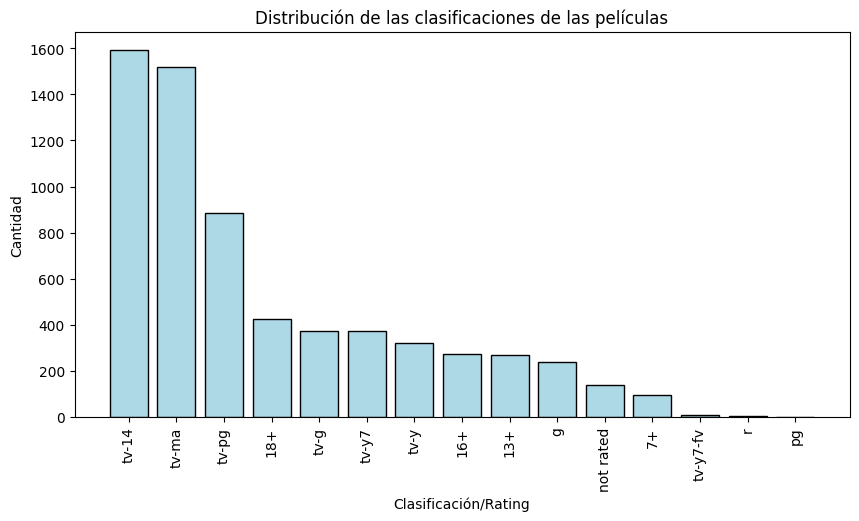

In [86]:
# Filtro por tipo "movie"
movie_df = df[df['type'] == 'tv show']

# Cuento el número de películas por rating
rating_counts = movie_df['rating'].value_counts()

# Ordeno los valores de mayor a menor
rating_counts = rating_counts.sort_values(ascending=False)

# Creo el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(rating_counts.index, rating_counts.values, color='lightblue', edgecolor='black')
plt.xlabel('Clasificación/Rating')
plt.ylabel('Cantidad')
plt.title('Distribución de las clasificaciones de las películas')
plt.xticks(rotation=90)
plt.show()

Luego de intentar verificar las demas columnas se percibe demasiado variados y nulos en sus registros por lo que no se puede apreciar correctamente los graficos.

Verifico la relacion de las variables. No encuentro ninguna correlacion entre ellas.

C:\Users\Hernan\AppData\Local\Temp\ipykernel_12956\1199373080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


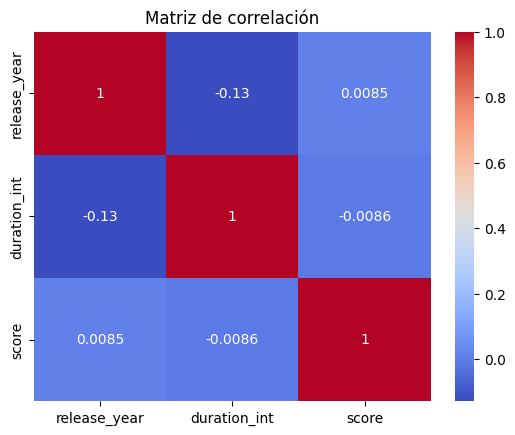

In [87]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()
